# 건강검진 데이터로 가설검정하기

### 1.가설
#### 1) 음주 여부에 따라 건강검진 수치 차이가 있을까?
#### 2) 신장과 허리둘에의 크기는 체중과 상관관계가 있을까?

### 2.라이브러리 로드

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 3.한글폰트 설정

In [3]:
# 한글폰트 설정
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

# 폰트가 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

### 4.데이터 불어오기

In [4]:
# 데이터 불러오기
df = pd.read_csv('./data/NHIS_OPEN_GJ_2017.CSV', encoding='cp949')

#### 4.1 데이터 미리보기

In [4]:
df.head()
#df.tail()
#df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [5]:
df.shape

(1000000, 34)

#### 4.2 데이터 요약하기

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [7]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

### 5.결측치 보기

#### 5.1 결측치 개수보기

In [8]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [9]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<AxesSubplot: >

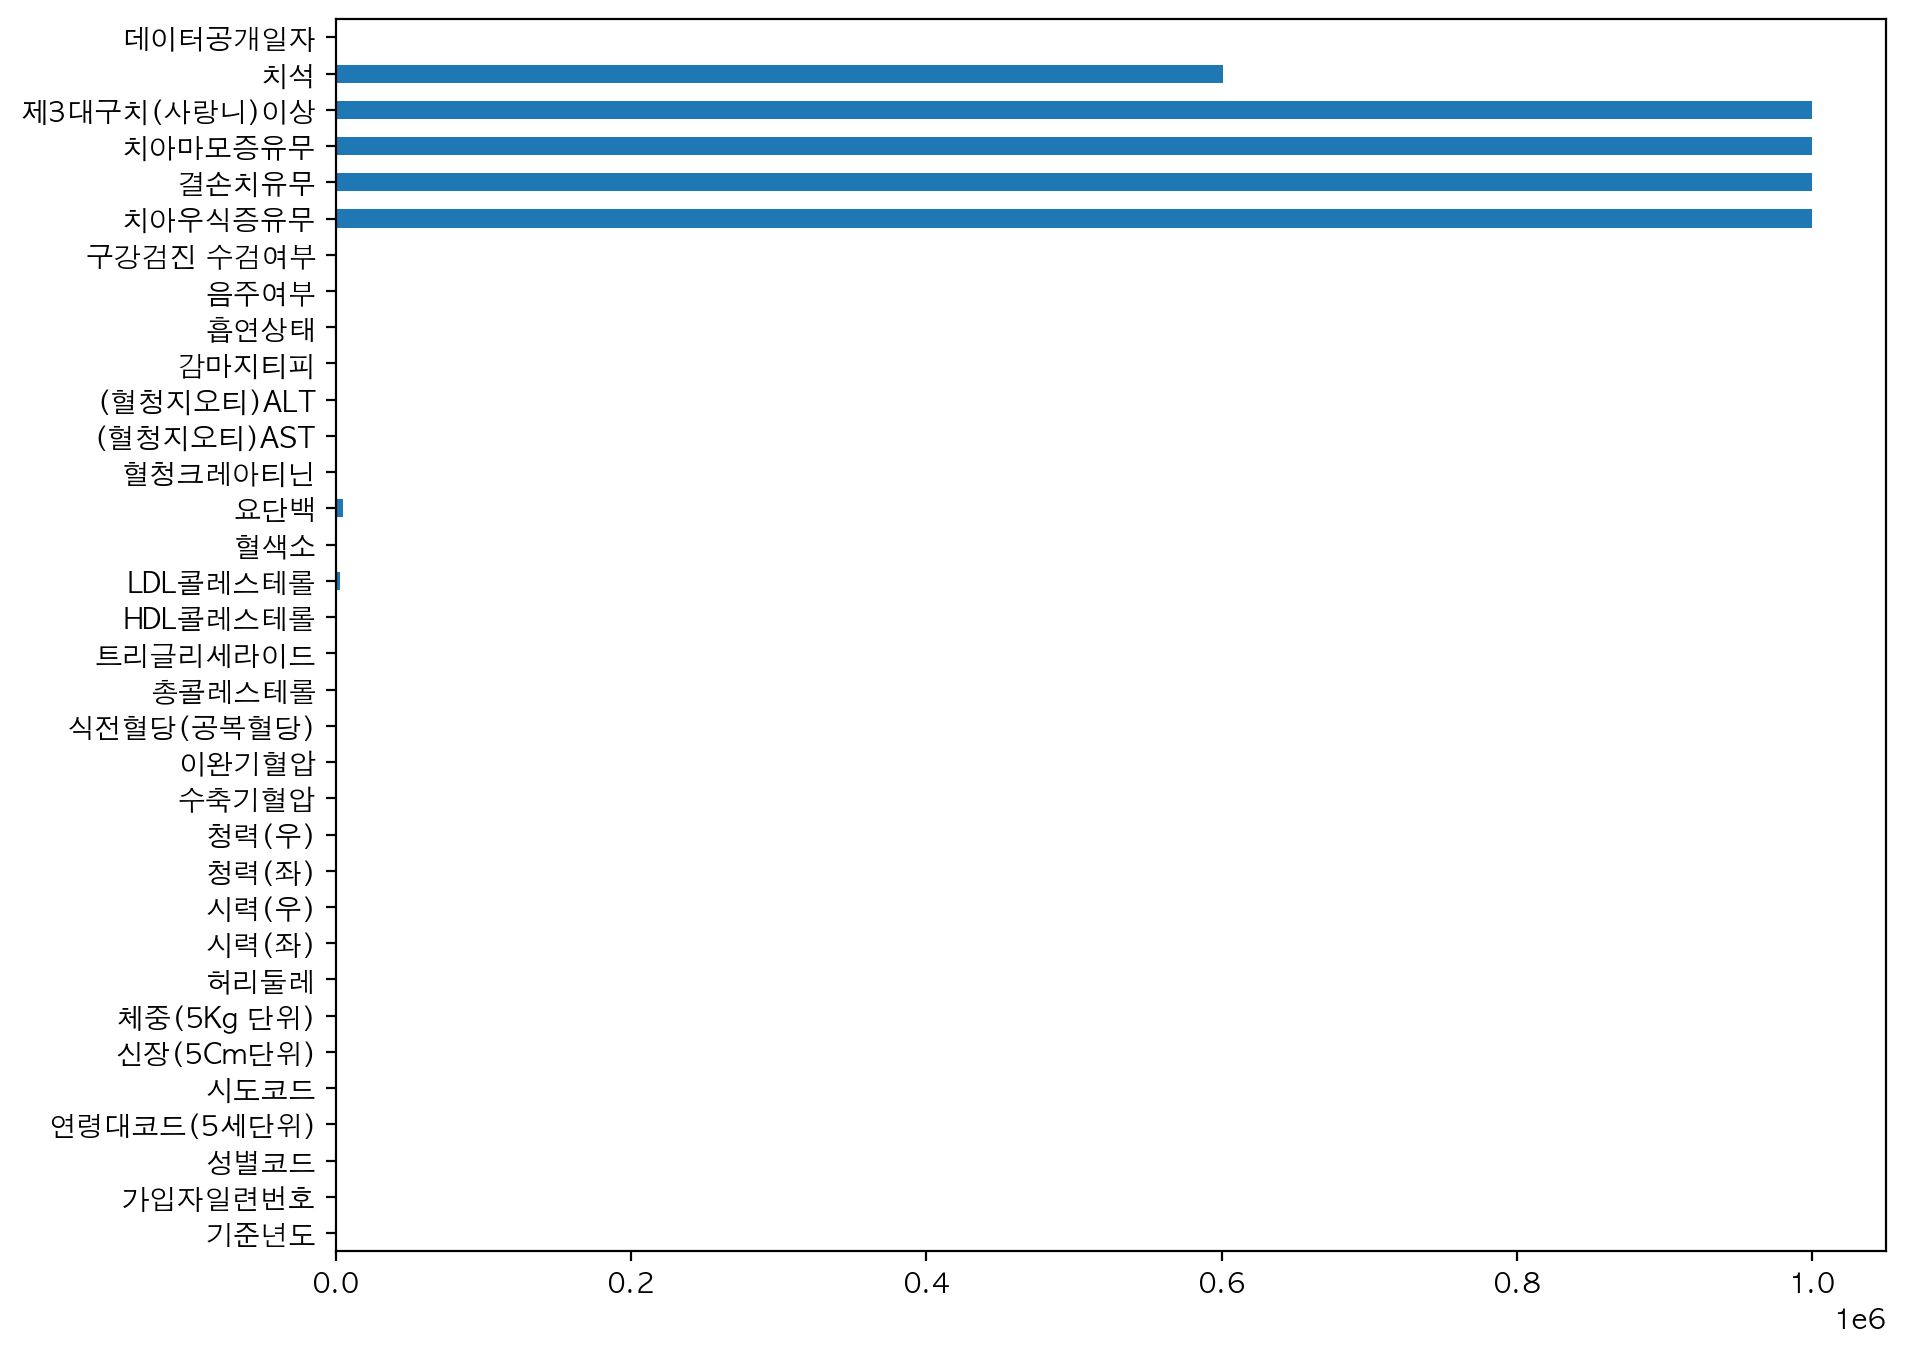

In [10]:
df.isnull().sum().plot.barh(figsize=(10,8))

### 6.일부 데이터 요약하기

In [11]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]]

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0
...,...,...
999995,11.0,18.0
999996,11.0,21.0
999997,13.0,23.0
999998,30.0,28.0


In [12]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


### 7.value_counts로 값 집계하기

In [13]:
df['성별코드'].value_counts()

1    531172
2    468828
Name: 성별코드, dtype: int64

In [14]:
df['흡연상태'].value_counts()

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

### 8.groupby와 pivot_table 사용하기

#### 8.1 groupby 사용하기

In [19]:
# 성별코드 값에 따라 모든 열에 대한 평균
df.groupby(by='성별코드').mean().round(2)

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2017.0,499946.58,10.32,34.15,168.52,70.21,85.17,1.04,1.03,1.03,...,49.45,2.06,0.67,0.43,NaN,NaN,NaN,NaN,0.64,20181126.0
2,2017.0,500061.59,10.78,33.26,155.08,55.70,77.06,0.92,0.91,1.03,...,23.40,1.09,0.30,0.36,NaN,NaN,NaN,NaN,0.55,20181126.0


In [21]:
# 성별코드별 개수
df.groupby(by='성별코드')['가입자일련번호'].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [28]:
# 성별코드에 따른 음주 상태
df.groupby(by=['성별코드','음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [32]:
# 성별코드에 따른 간수치 지수
df.groupby(by=['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [33]:
# max 값이 999인 값이 있어 편향되어있다는 것을 알 수 있다.
df.groupby(by=['성별코드', '음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [34]:
# 그래서 mean, median 값을 같이 나타내본다.
df.groupby(by=['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

#### 8.2 pivot_table 사용하기

In [38]:
df.pivot_table(index='성별코드', values='가입자일련번호', aggfunc='count')

,가입자일련번호
성별코드,
1,531172
2,468828


In [39]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [43]:
pd.pivot_table(df, index="음주여부", values="감마지티피").round(2)
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"]).round(2)

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.86,19.0
1.0,47.75,30.0


In [44]:
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     2     13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
1.0  1     24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
     2     13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

### 9.히스토그램 사용하기

#### 9.1 전체 데이터의 히스토그램 그리기

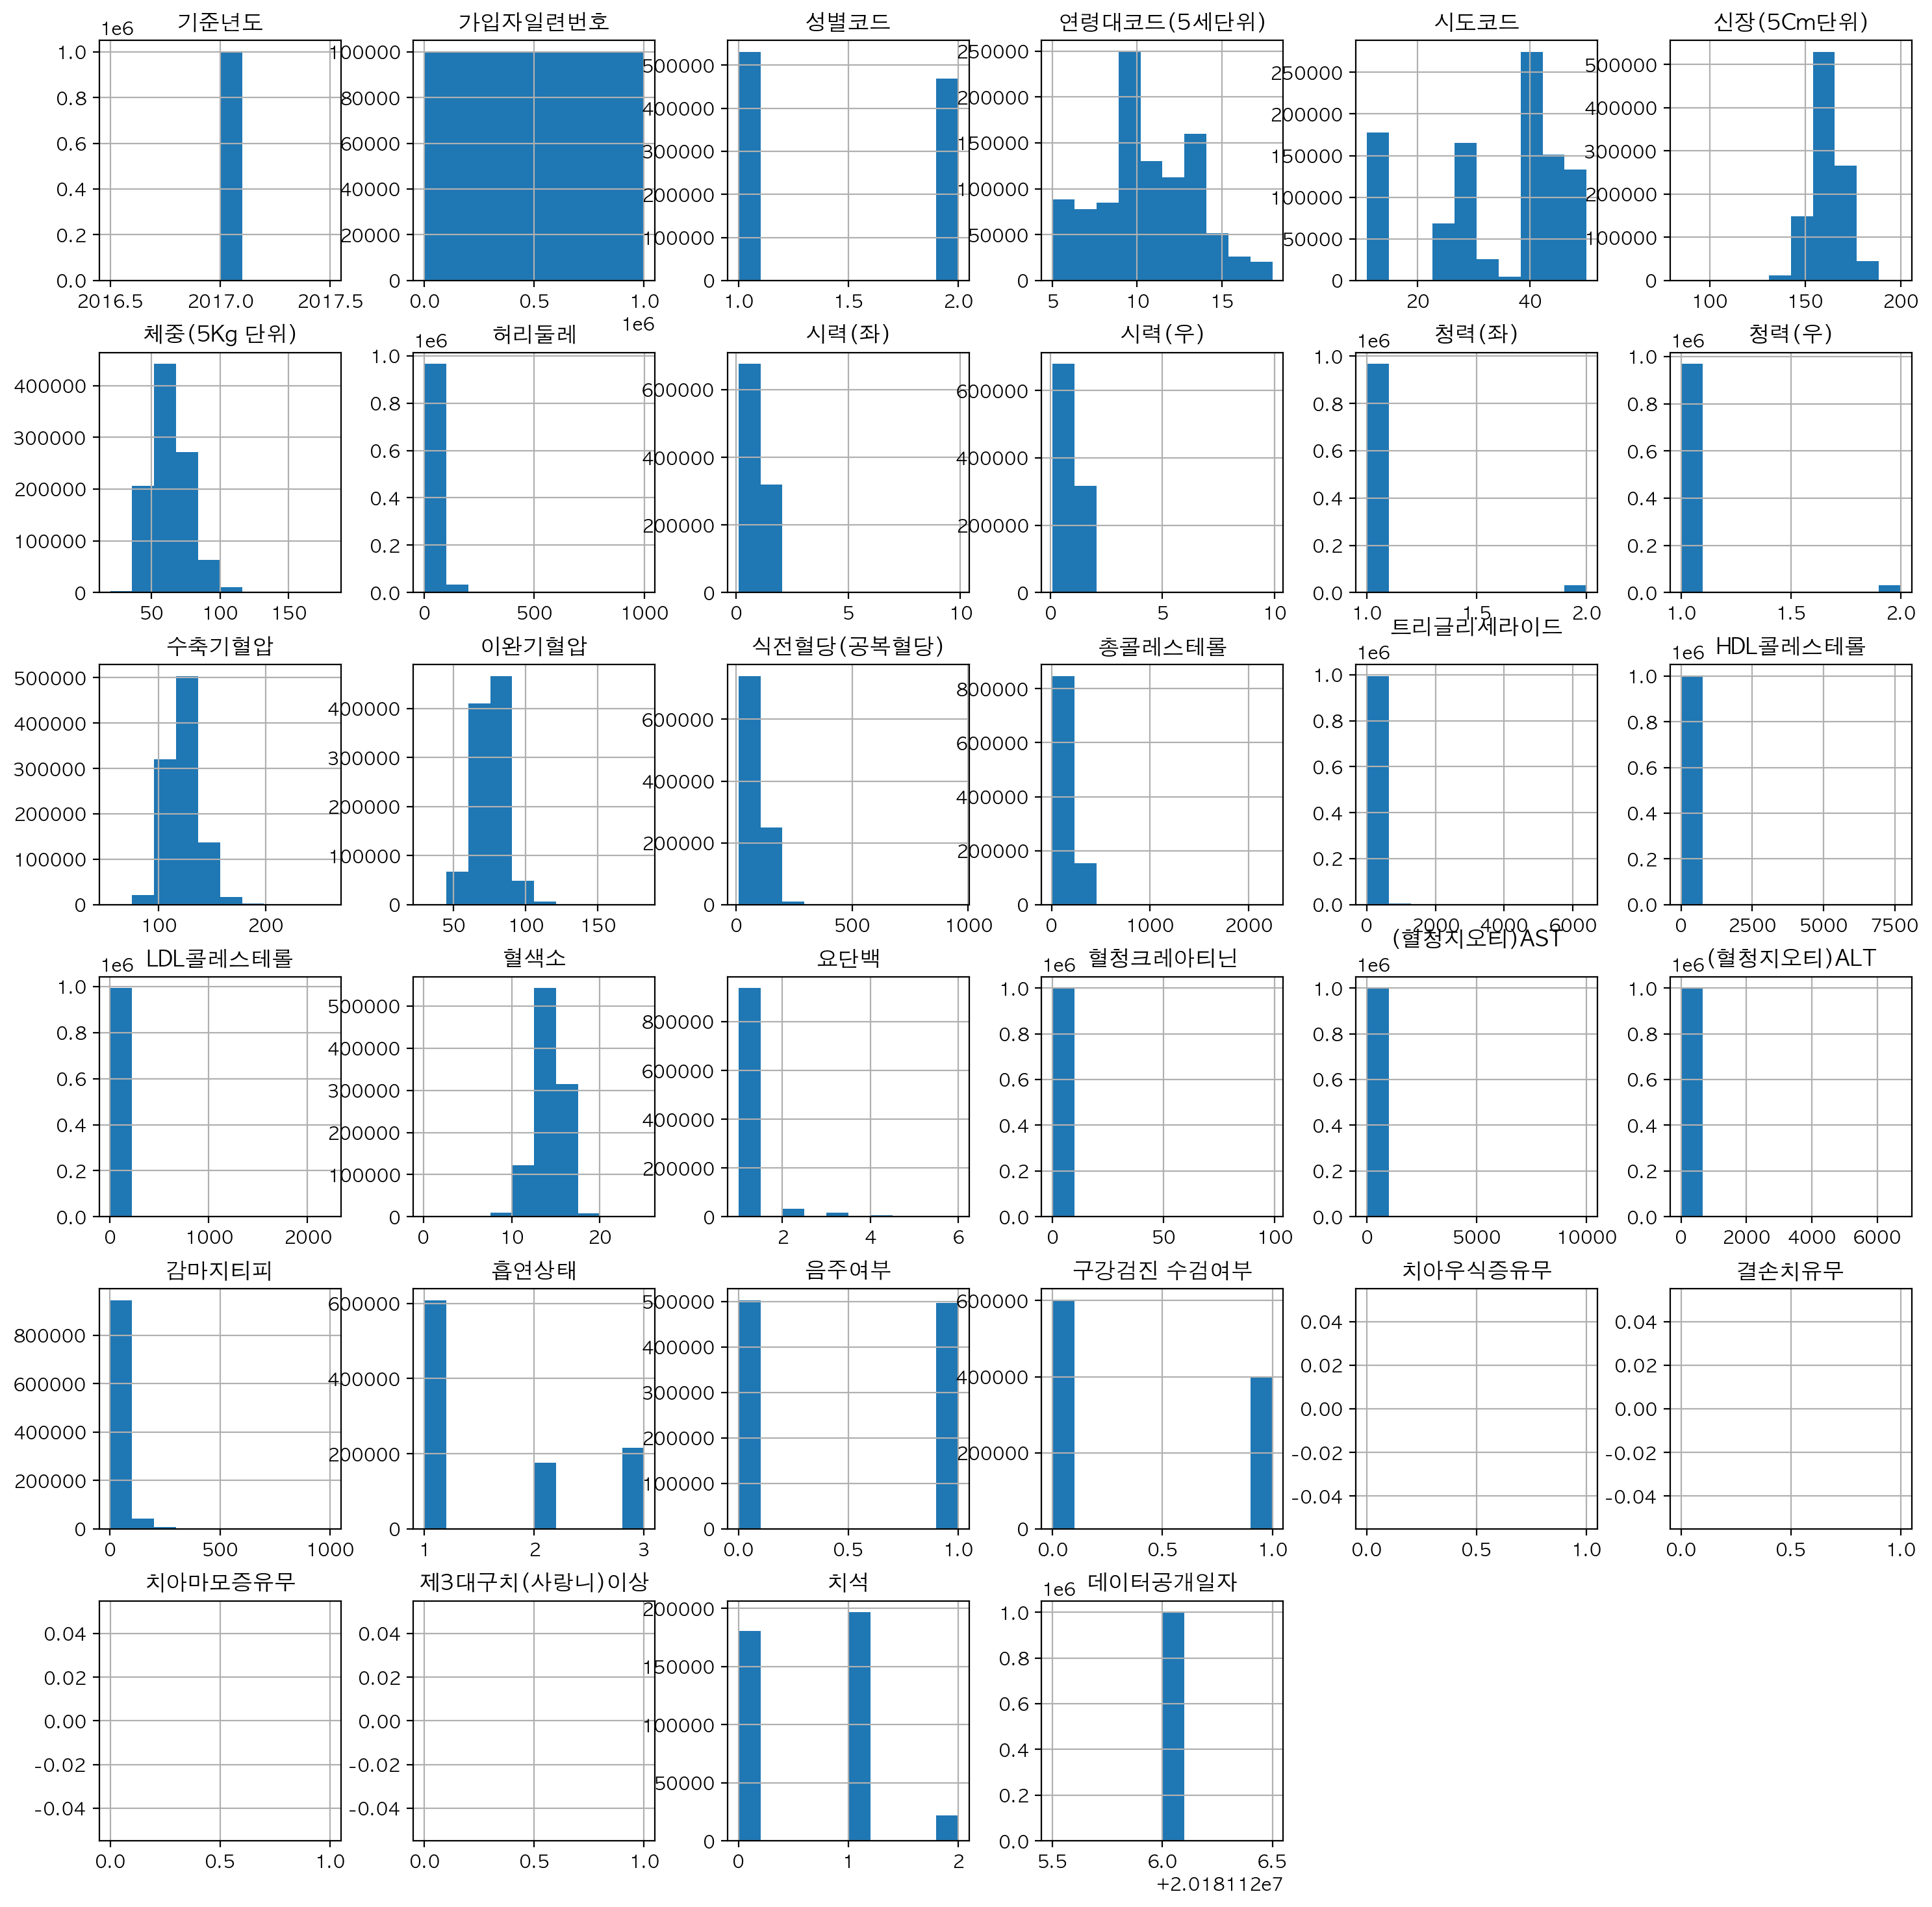

In [12]:
h = df.hist(figsize=(18,18))

#### 9.2 iloc를 활용하여 히스토그램 그리기

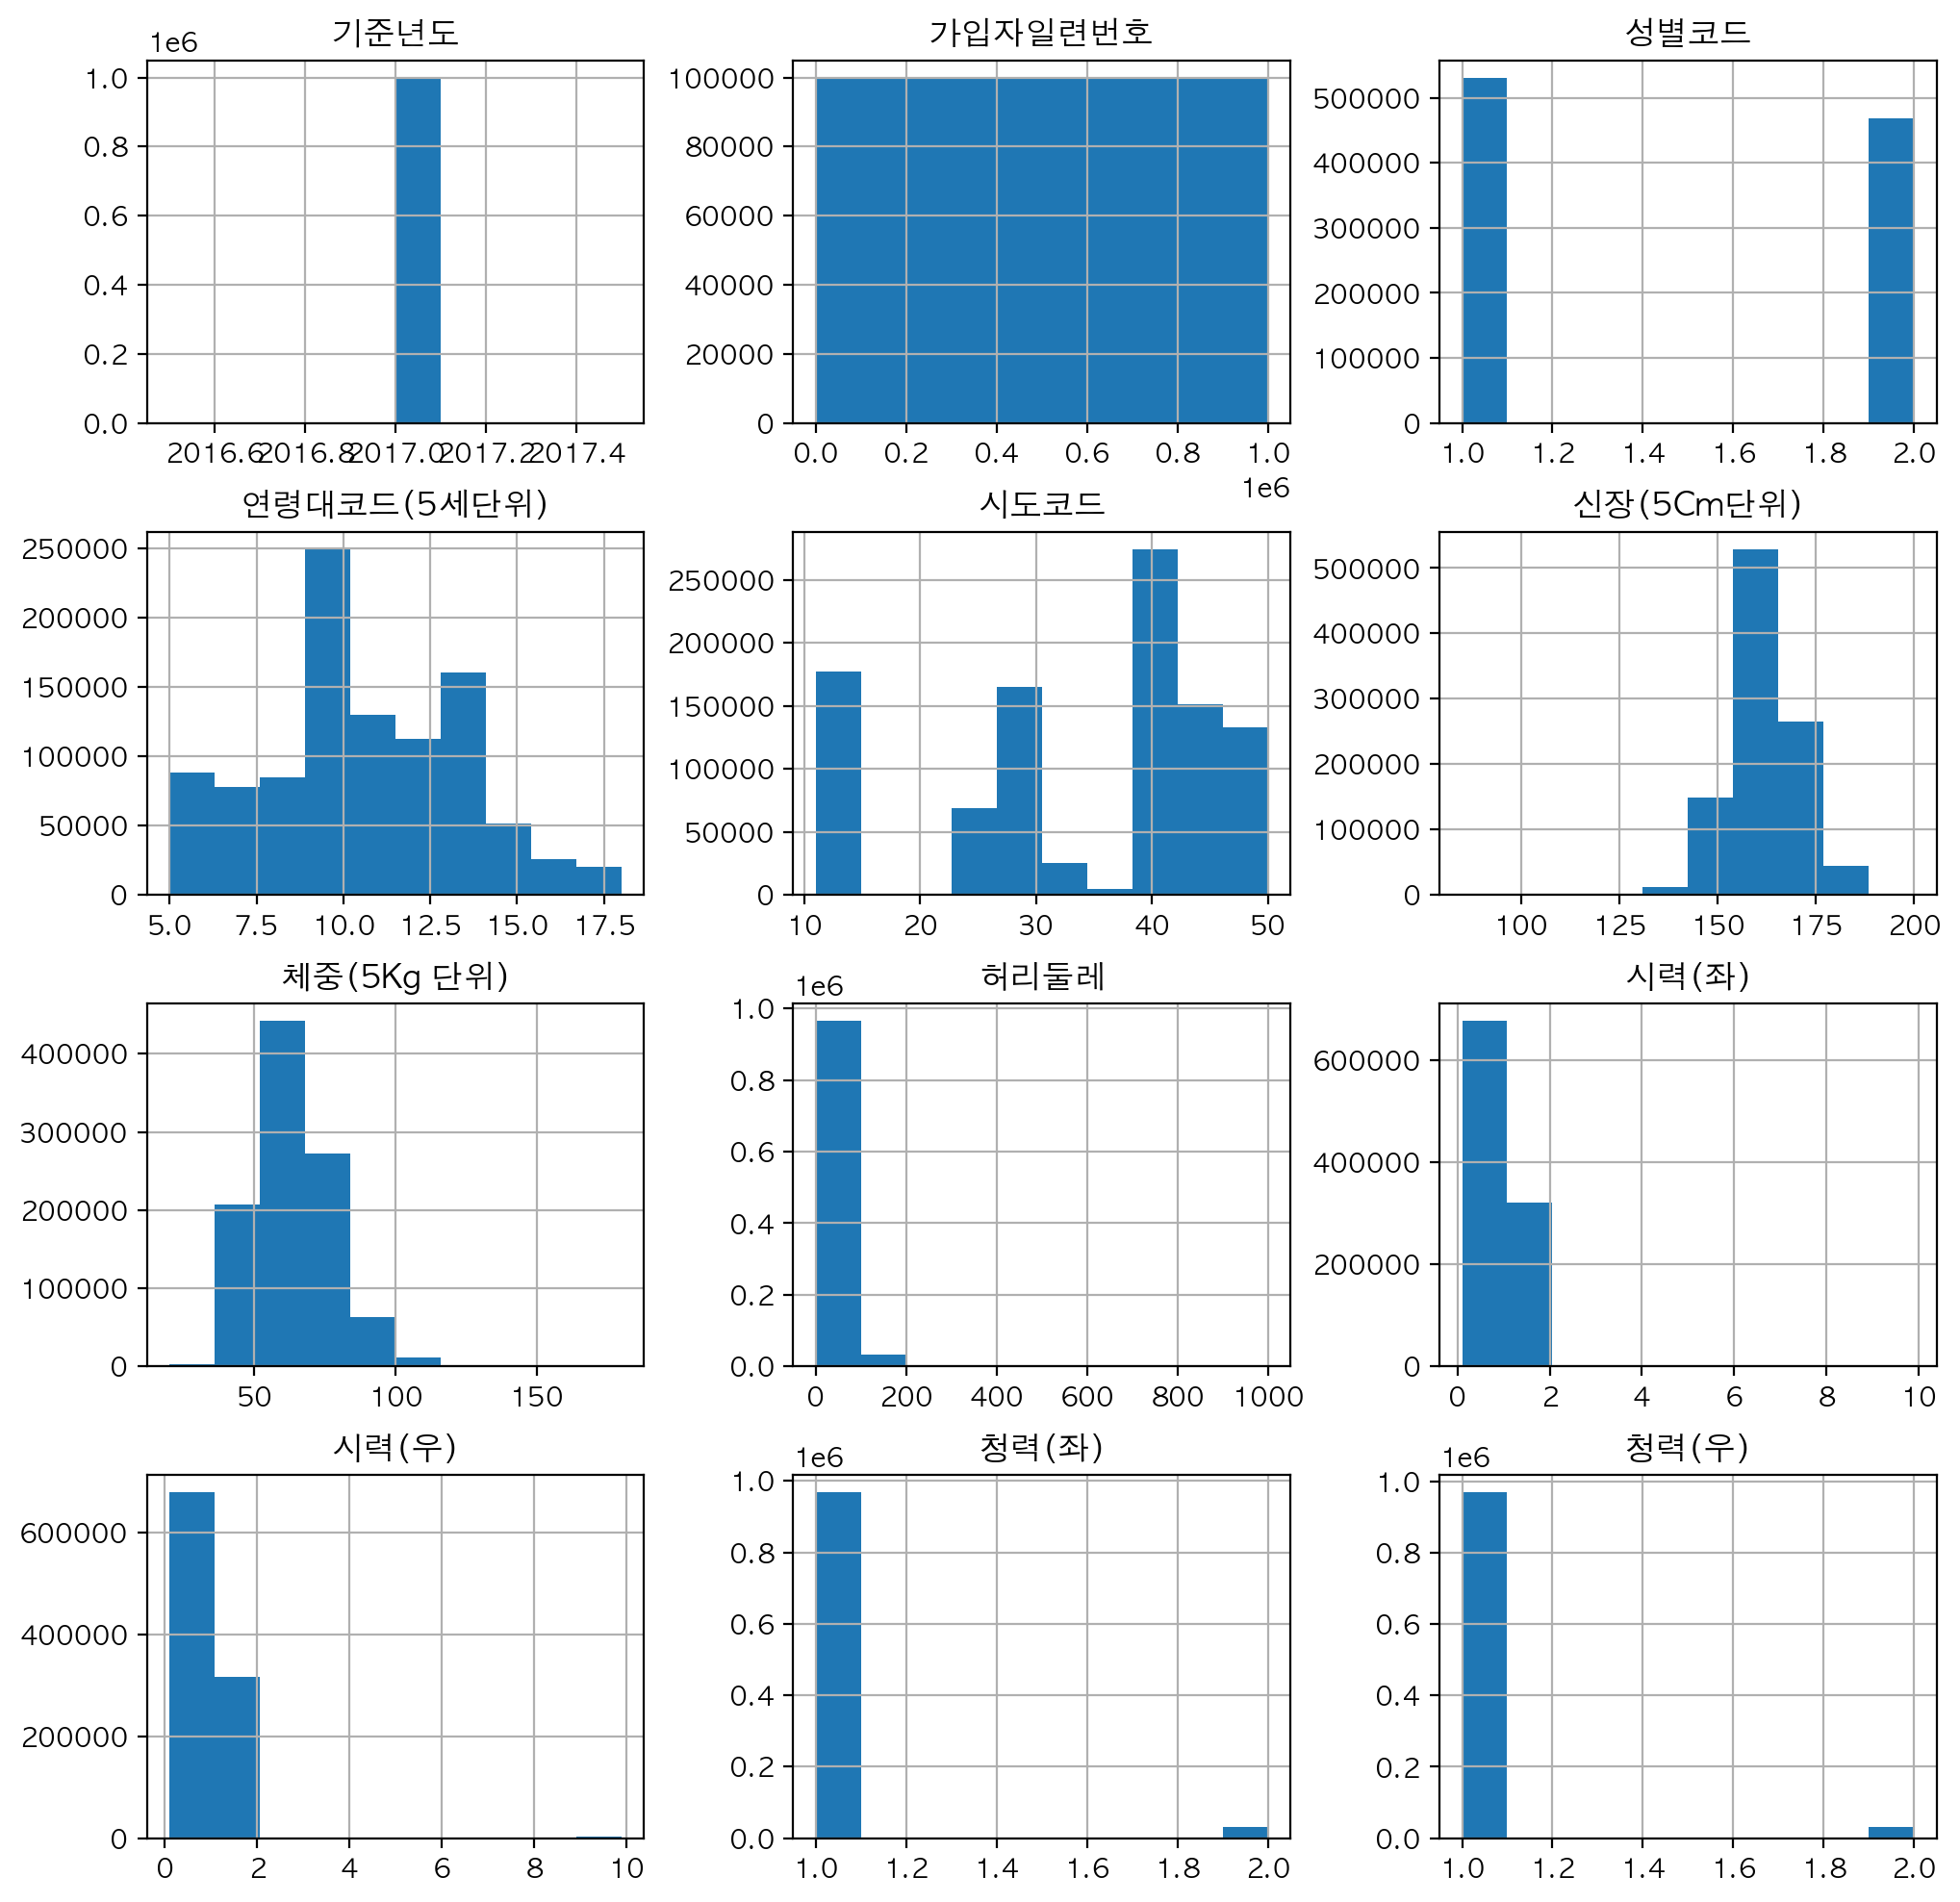

In [10]:
# 12개의 컬럼의 데이터만 히스토그램 그리기
h = df.iloc[:, :12].hist(figsize=(12,12))

### 10.데이터의 빈도수 시각화 하기 - countplot(막대그래프)

#### 10.1 샘플 데이터 추출하기

In [14]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

#### 10.2 범주형 데이터 시각화 - 음주여부

##### 10.2.1 countplot

<AxesSubplot: >

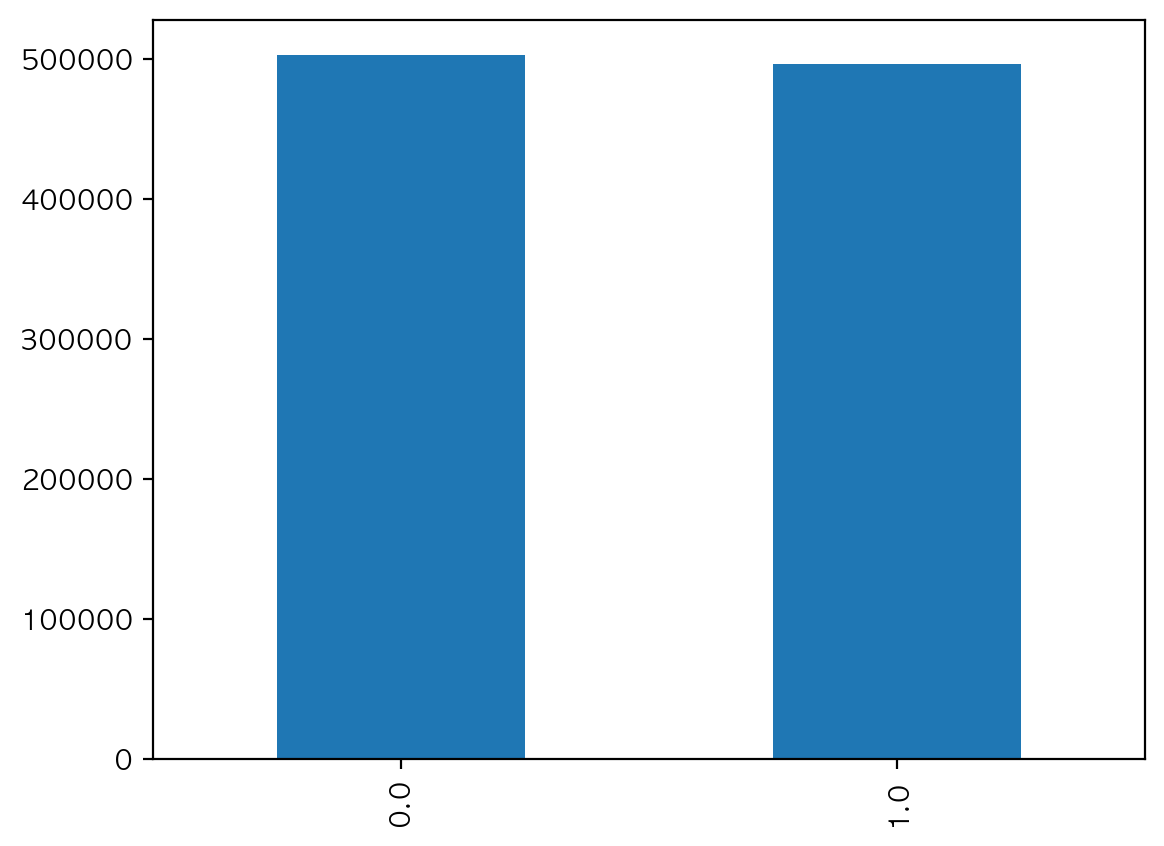

In [18]:
df['음주여부'].value_counts().plot.bar()

##### 10.2.2 sns.countplot

<AxesSubplot: xlabel='음주여부', ylabel='count'>

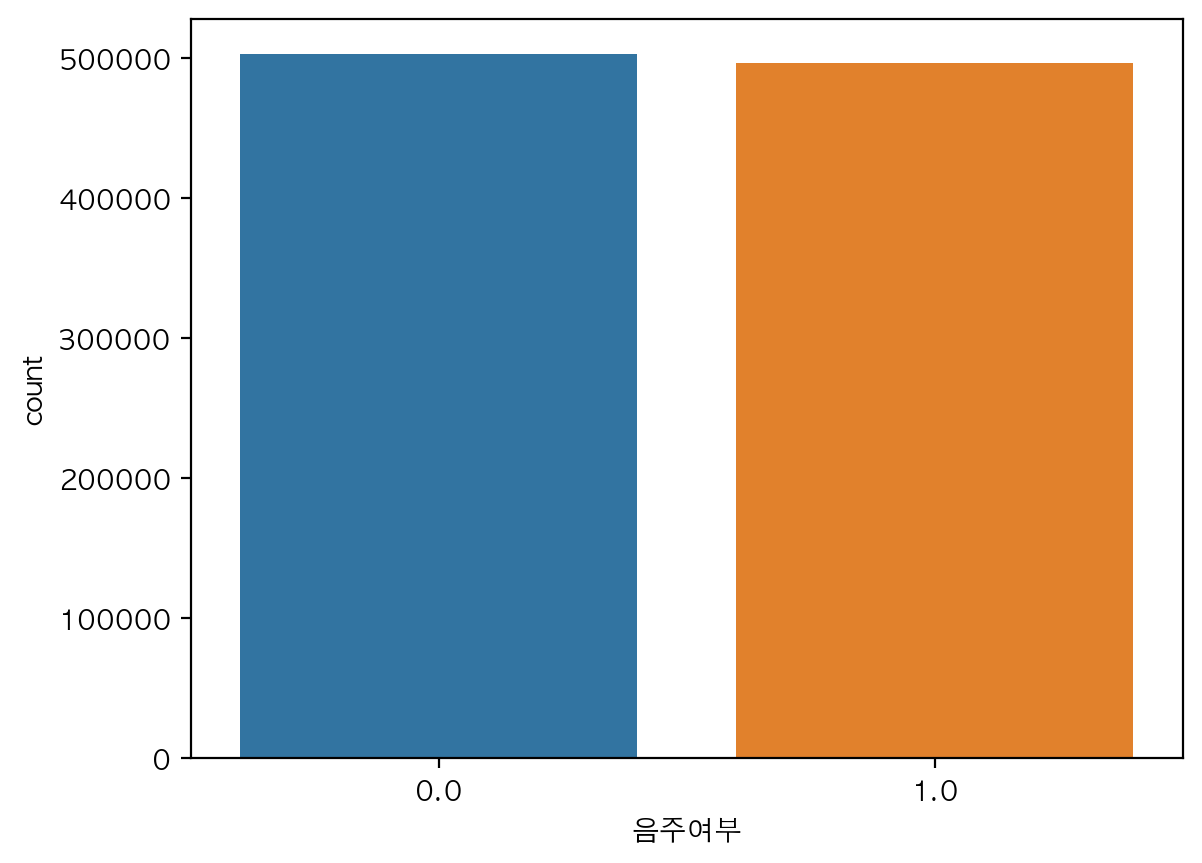

In [16]:
sns.countplot(x='음주여부', data=df)

<AxesSubplot: xlabel='음주여부', ylabel='count'>

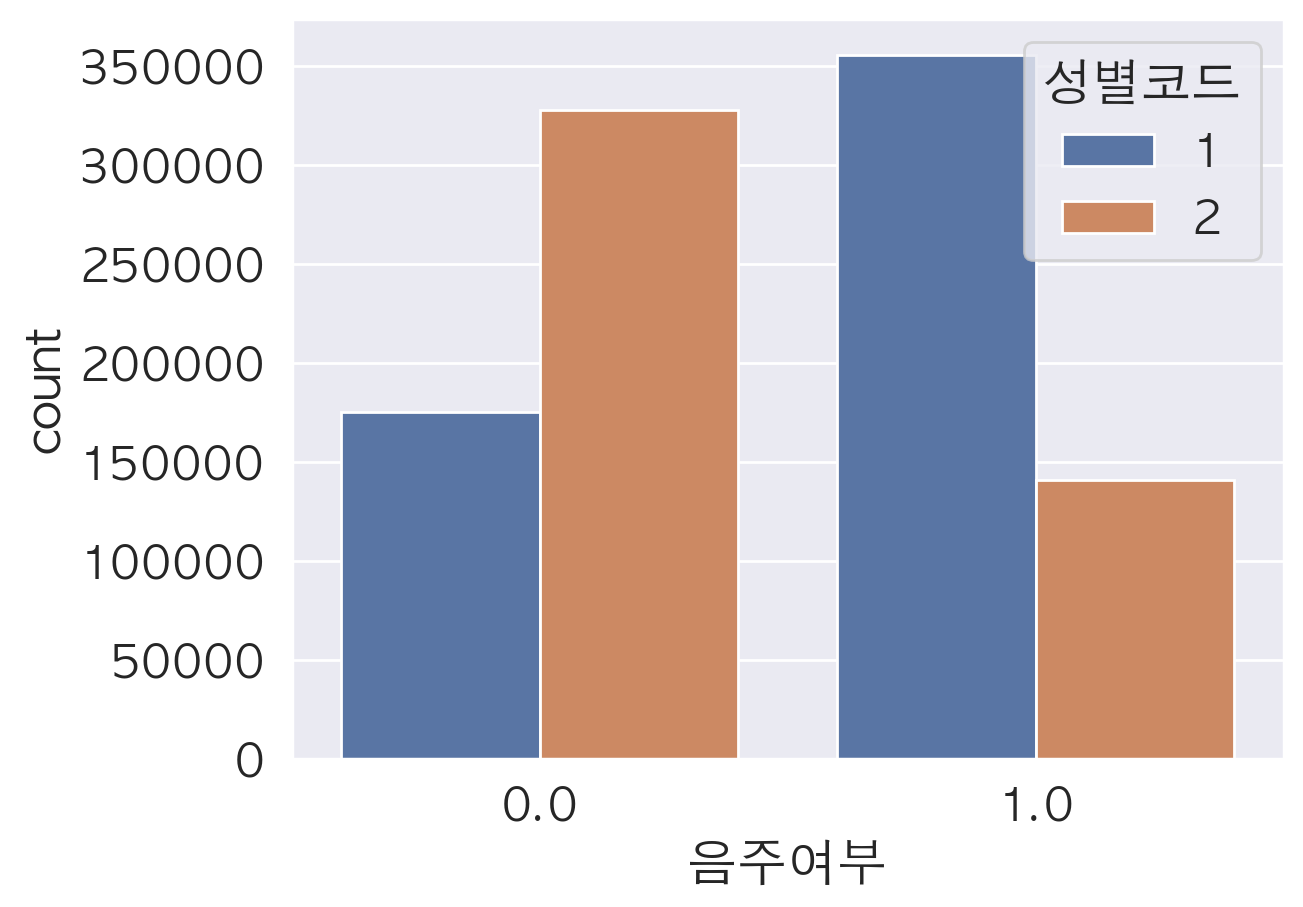

In [21]:
# hue를 활용하여 "성별코드"를 같이 나타내기

# sns.set(font_scale=1.5, font="AppleGothic")
sns.countplot(x='음주여부', data=df, hue='성별코드')

#### 10.3 범주형 데이터 시각화 - 키와 몸무게

##### 10.3.1 키 - countplot

<AxesSubplot: xlabel='신장(5Cm단위)', ylabel='count'>

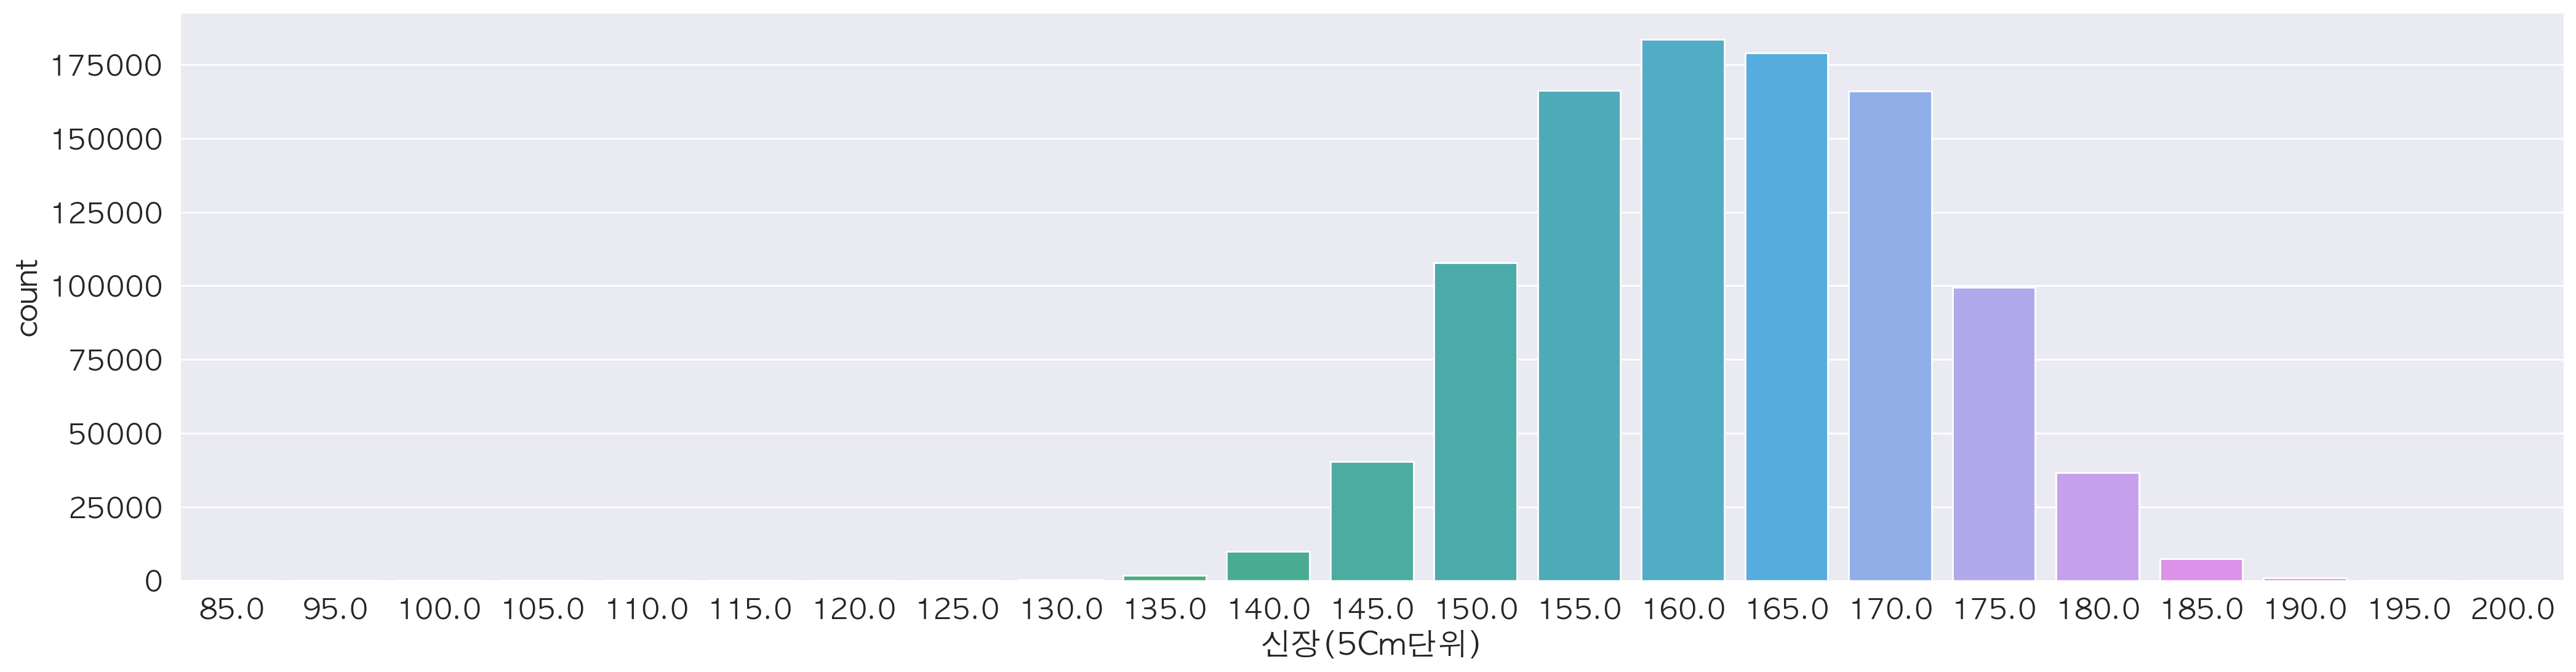

In [29]:
# 전체 데이터에서의 키
plt.figure(figsize=(25,6))
sns.countplot(data=df, x='신장(5Cm단위)')

<AxesSubplot: xlabel='신장(5Cm단위)', ylabel='count'>

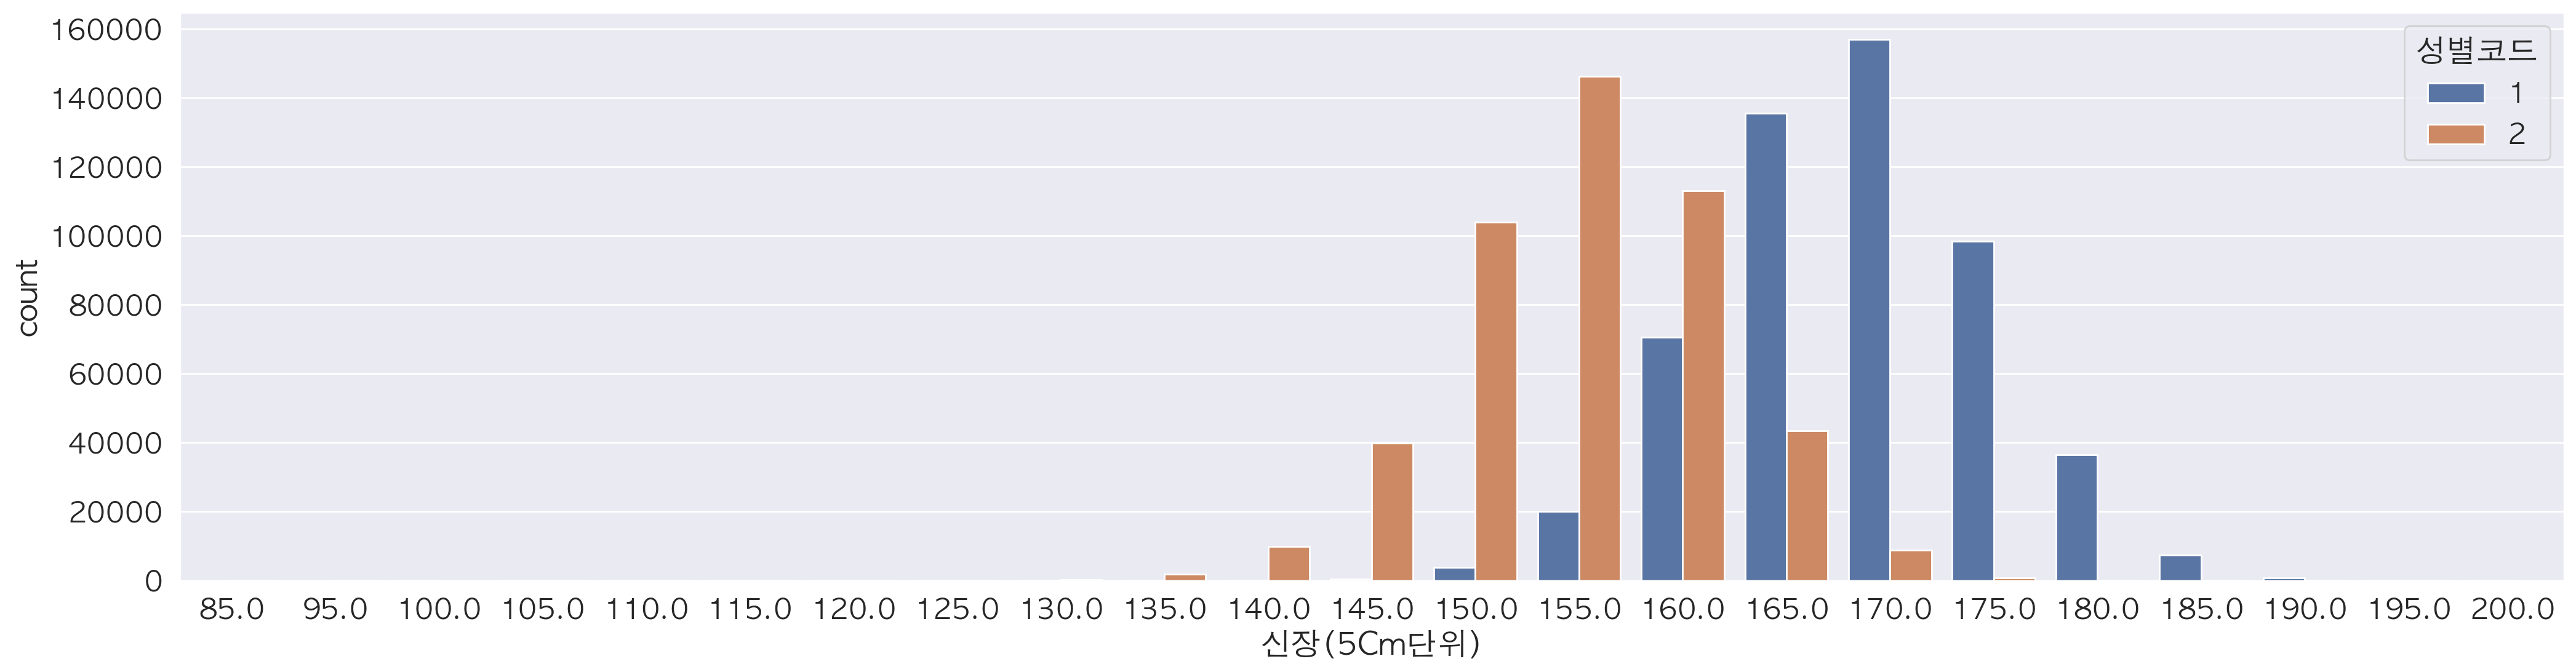

In [30]:
# 성별코드에 따른 키
plt.figure(figsize=(25,6))
sns.countplot(data=df, x='신장(5Cm단위)', hue='성별코드')

##### 10.3.2 몸무게 - countplot

<AxesSubplot: xlabel='체중(5Kg 단위)', ylabel='count'>

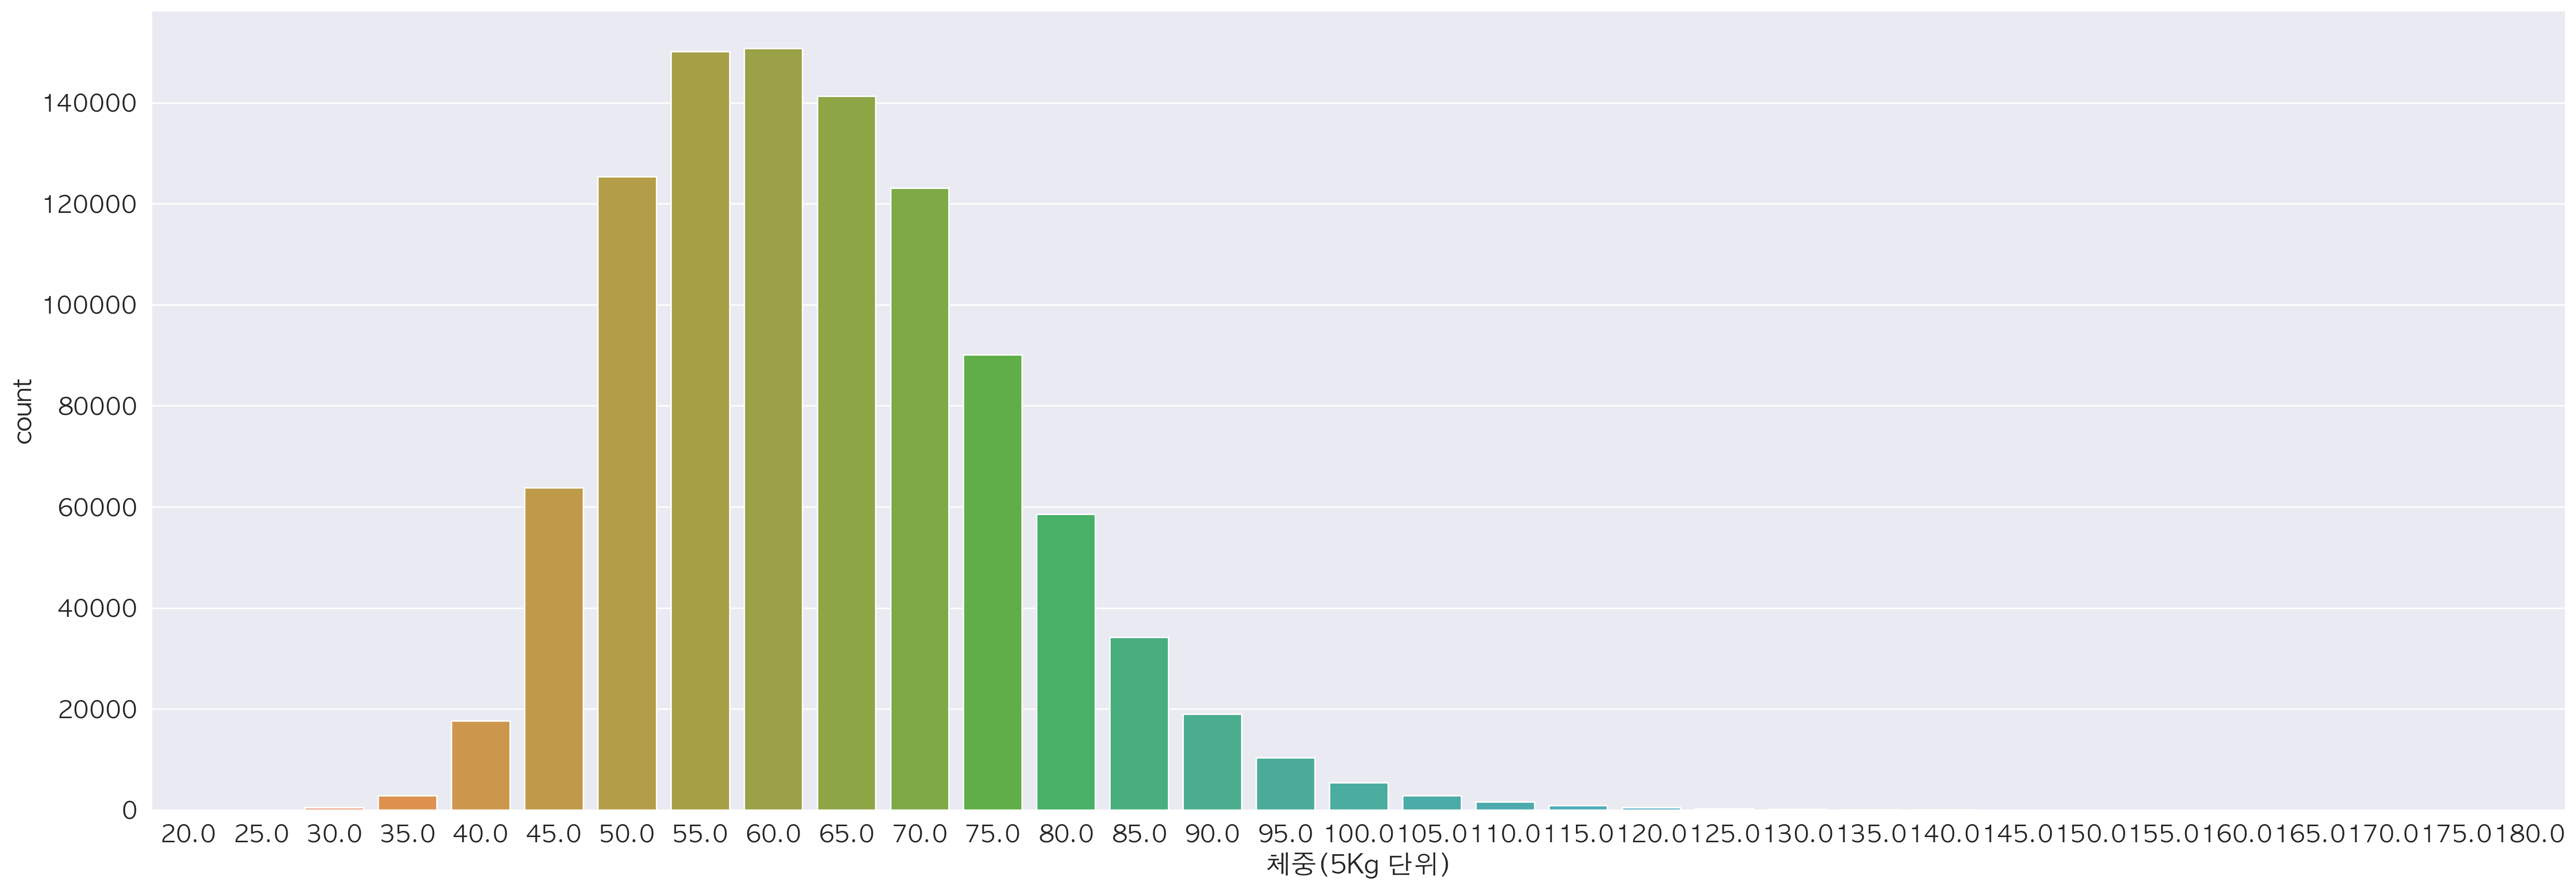

In [34]:
# 전체 데이터에서 몸무게
plt.figure(figsize=(30,10))
sns.countplot(data=df, x='체중(5Kg 단위)')

<AxesSubplot: xlabel='체중(5Kg 단위)', ylabel='count'>

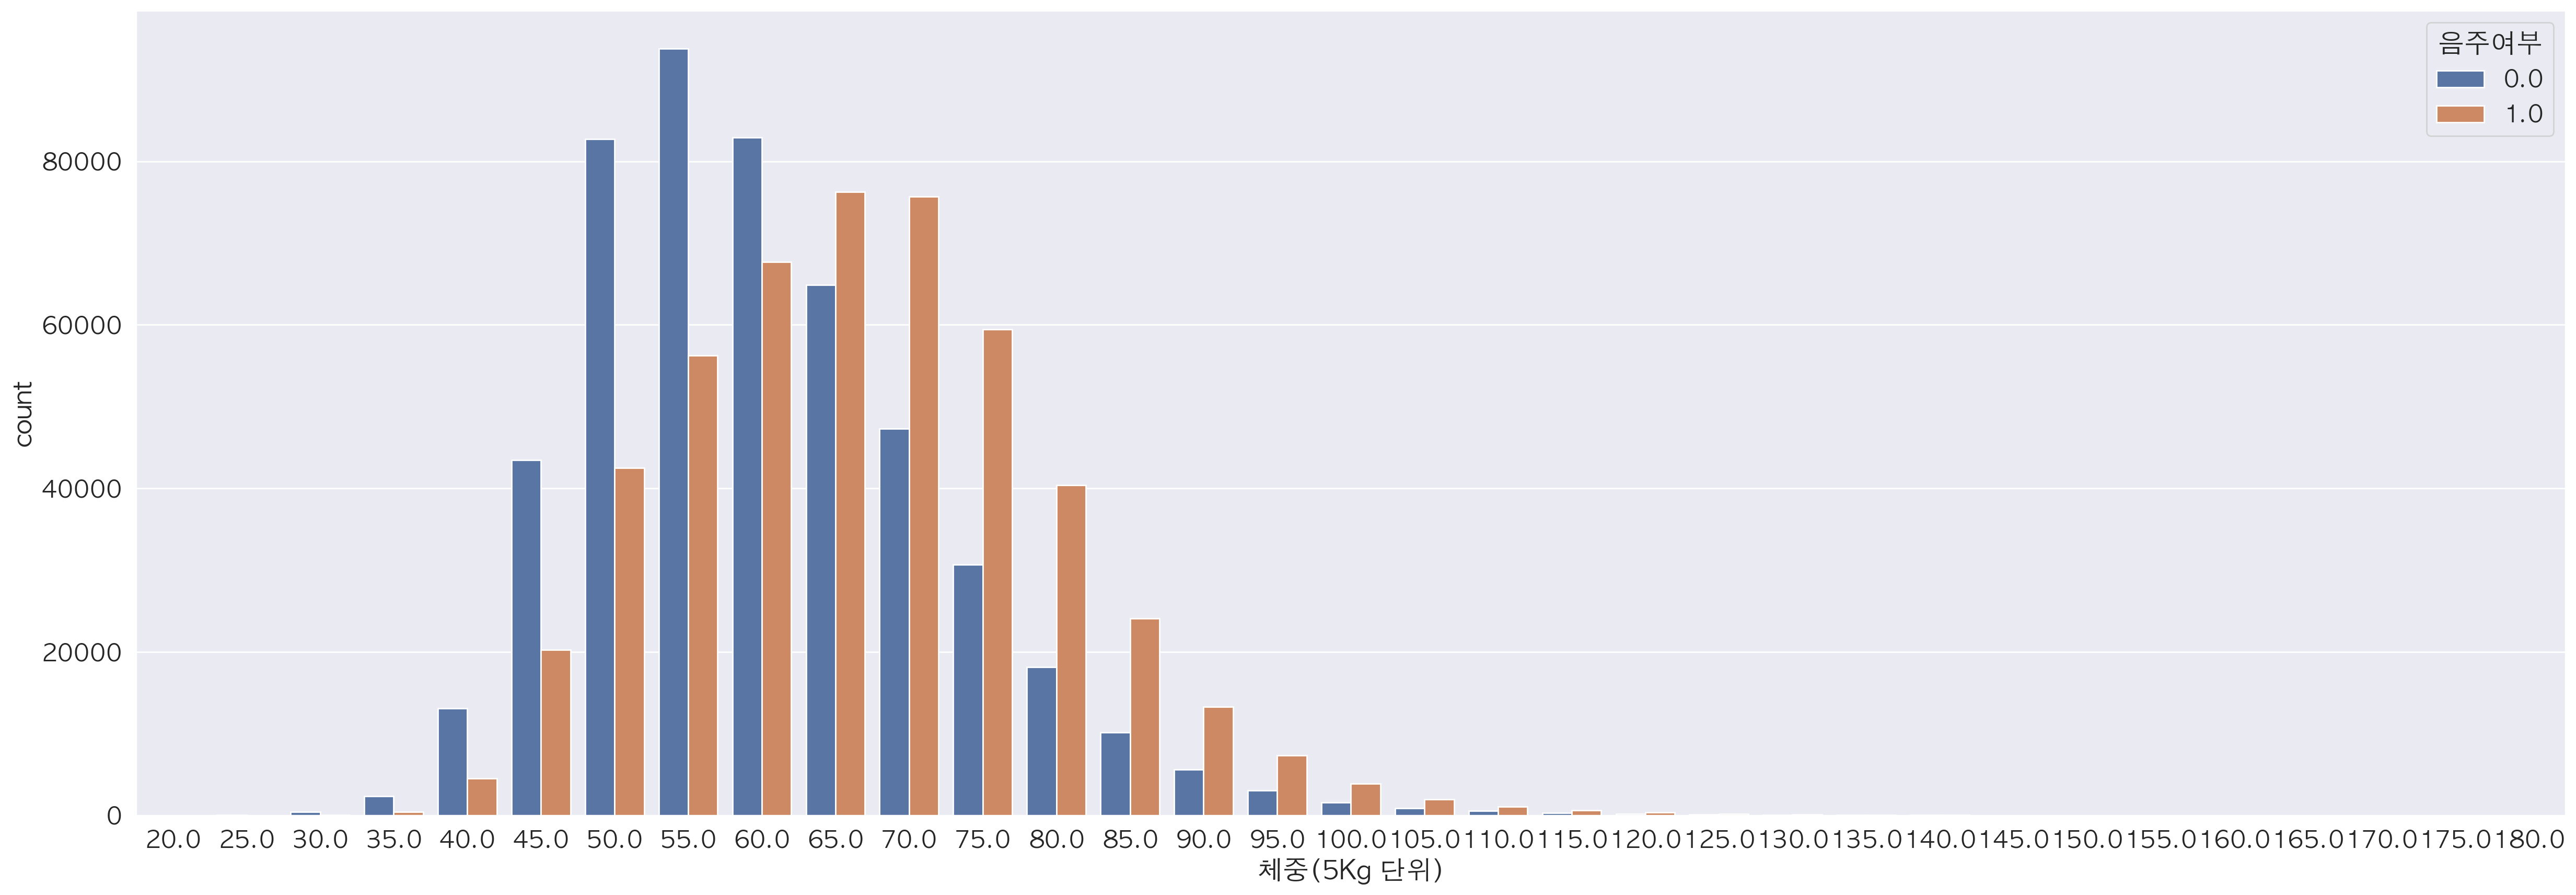

In [35]:
# 음주여부에 따른 몸무게
plt.figure(figsize=(30,10))
sns.countplot(data=df, x='체중(5Kg 단위)', hue='음주여부')